## Лабораторная работа №1
#### Вариант 3
#### Серпов Иван. 18-ИВТ-3

In [89]:
import pandas as pd
%matplotlib inline

In [92]:
autos = pd.read_csv('autos.csv', encoding='ANSI')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### 1. Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [93]:
autos_clear = autos.drop(['seller', 'offerType', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns')
autos_clear.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TЬRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


### 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [94]:
print("Размер базы до удаления:", len(autos.index))
autos_mod = autos.drop_duplicates(['name','price','abtest','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType', 'brand'
                         ,'notRepairedDamage'])
autos_mod = autos_mod.dropna()
print("Размер базы после удаления:", len(autos_mod.index))

Размер базы до удаления: 371528
Размер базы после удаления: 256901


### 3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

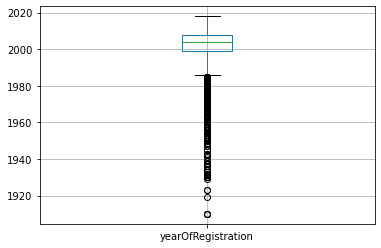

In [95]:
autos_mod.boxplot(column=['yearOfRegistration'])

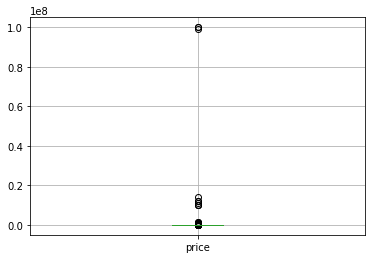

In [96]:
autos_mod.boxplot(column=['price'])

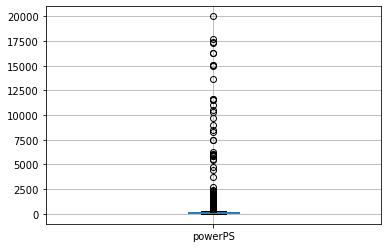

In [97]:
autos_mod.boxplot(column=['powerPS'])

In [98]:
autos_filter = autos_mod[
        (autos_mod.yearOfRegistration <= 2015) &
       (autos_mod.yearOfRegistration >= 2000) &
       (autos_mod.price >= 1000) &
       (autos_mod.price <= 3500) &
       (autos_mod.powerPS >= 0) &
       (autos_mod.powerPS <= 3000)]
print("Размер базы до удаления:", len(autos_mod.index))
print("Размер базы после удаления:", len(autos_filter.index))

Размер базы до удаления: 256901
Размер базы после удаления: 54690


### 4. Заполнить пропущенные данные в строковых полях.

In [99]:
autos_fill = autos_mod

autos_fill['name'] = autos_mod['name'].fillna('no_information')
autos_fill['abtest'] = autos_mod['abtest'].fillna('no_information')
autos_fill['seller'] = autos_mod['seller'].fillna('no_information')
autos_fill['offerType'] = autos_mod['offerType'].fillna('no_information')
autos_fill['abtest'] = autos_mod['abtest'].fillna('no_information')
autos_fill['vehicleType'] = autos_mod['vehicleType'].fillna('no_information')
autos_fill['gearbox'] = autos_mod['gearbox'].fillna('no_information')
autos_fill['model'] = autos_mod['model'].fillna('no_information')
autos_fill['fuelType'] = autos_mod['fuelType'].fillna('no_information')
autos_fill['brand'] = autos_mod['brand'].fillna('no_information')
autos_fill['notRepairedDamage'] = autos_mod['notRepairedDamage'].fillna('no_information')

autos_fill.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


### 5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

In [100]:
from pylab import rcParams
rcParams['figure.figsize'] = 50,10
rcParams['font.size'] = 10

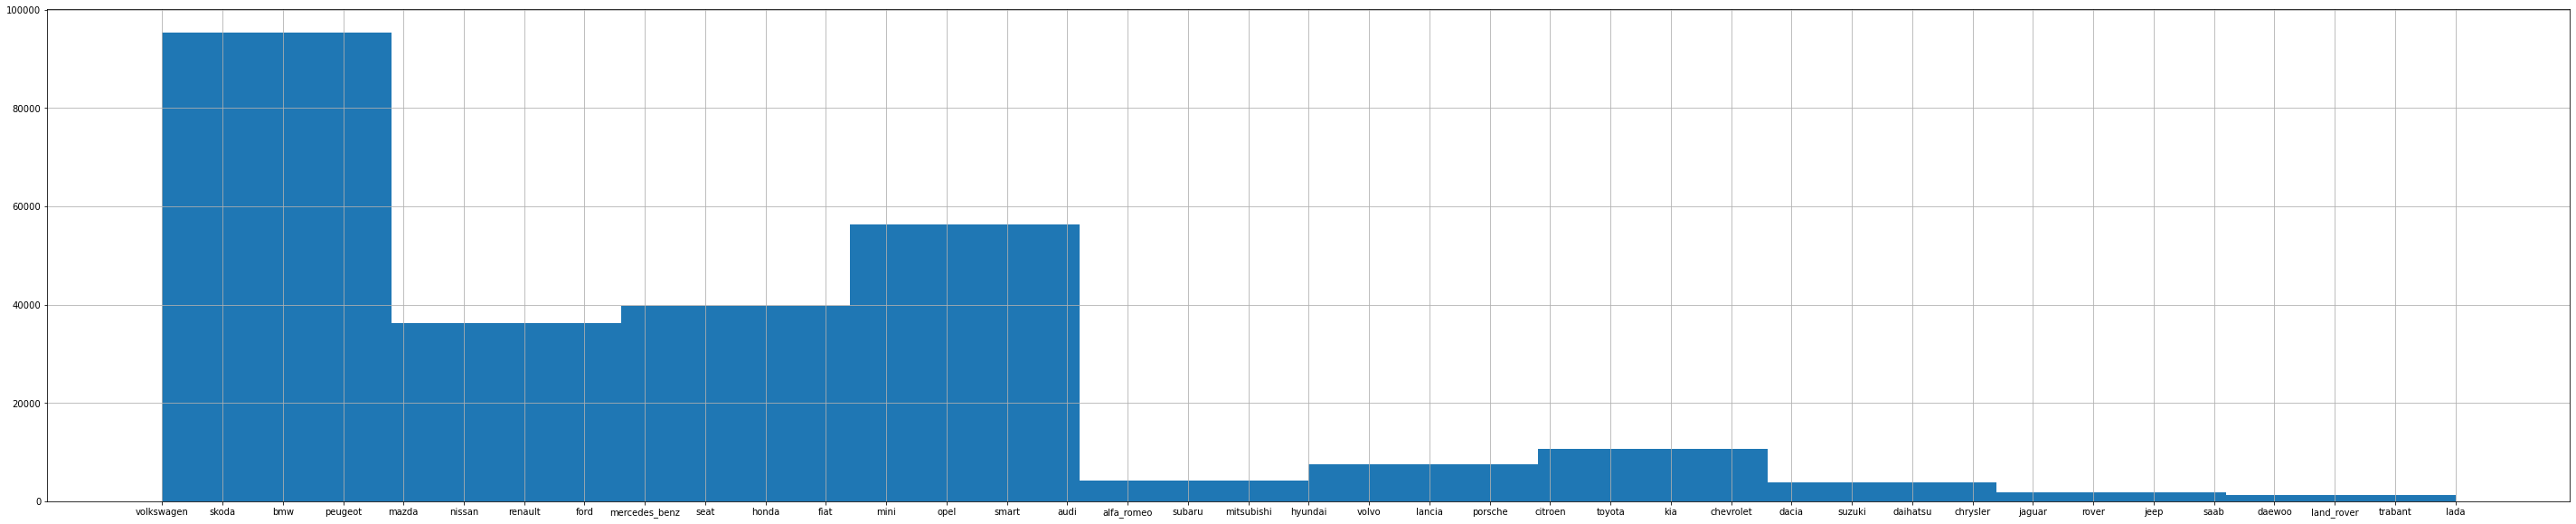

In [101]:
autos_fill['brand'].hist()

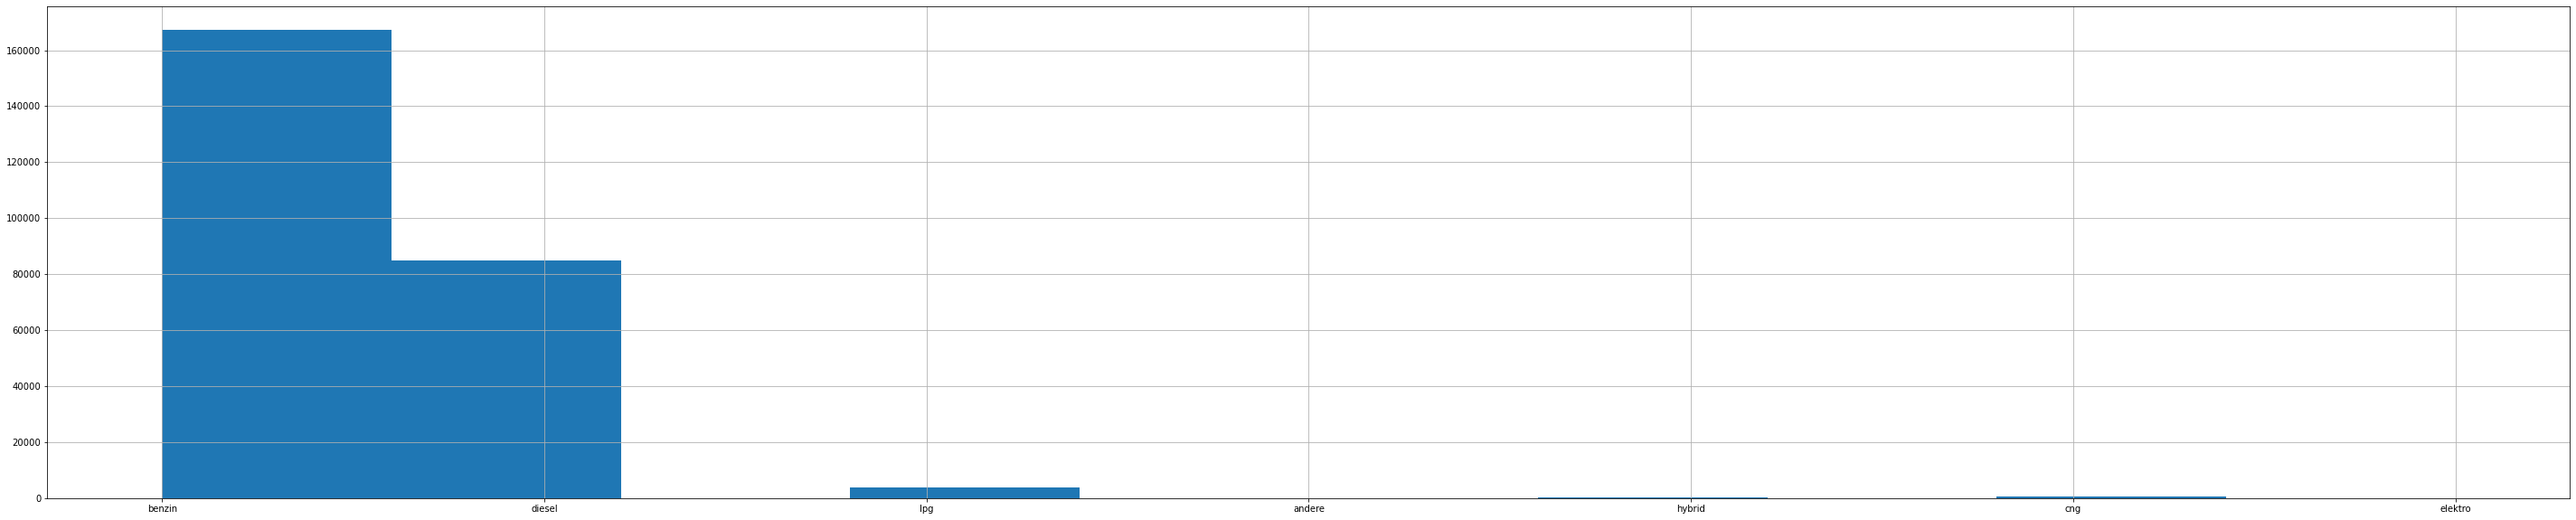

In [102]:
autos_fill['fuelType'].hist()

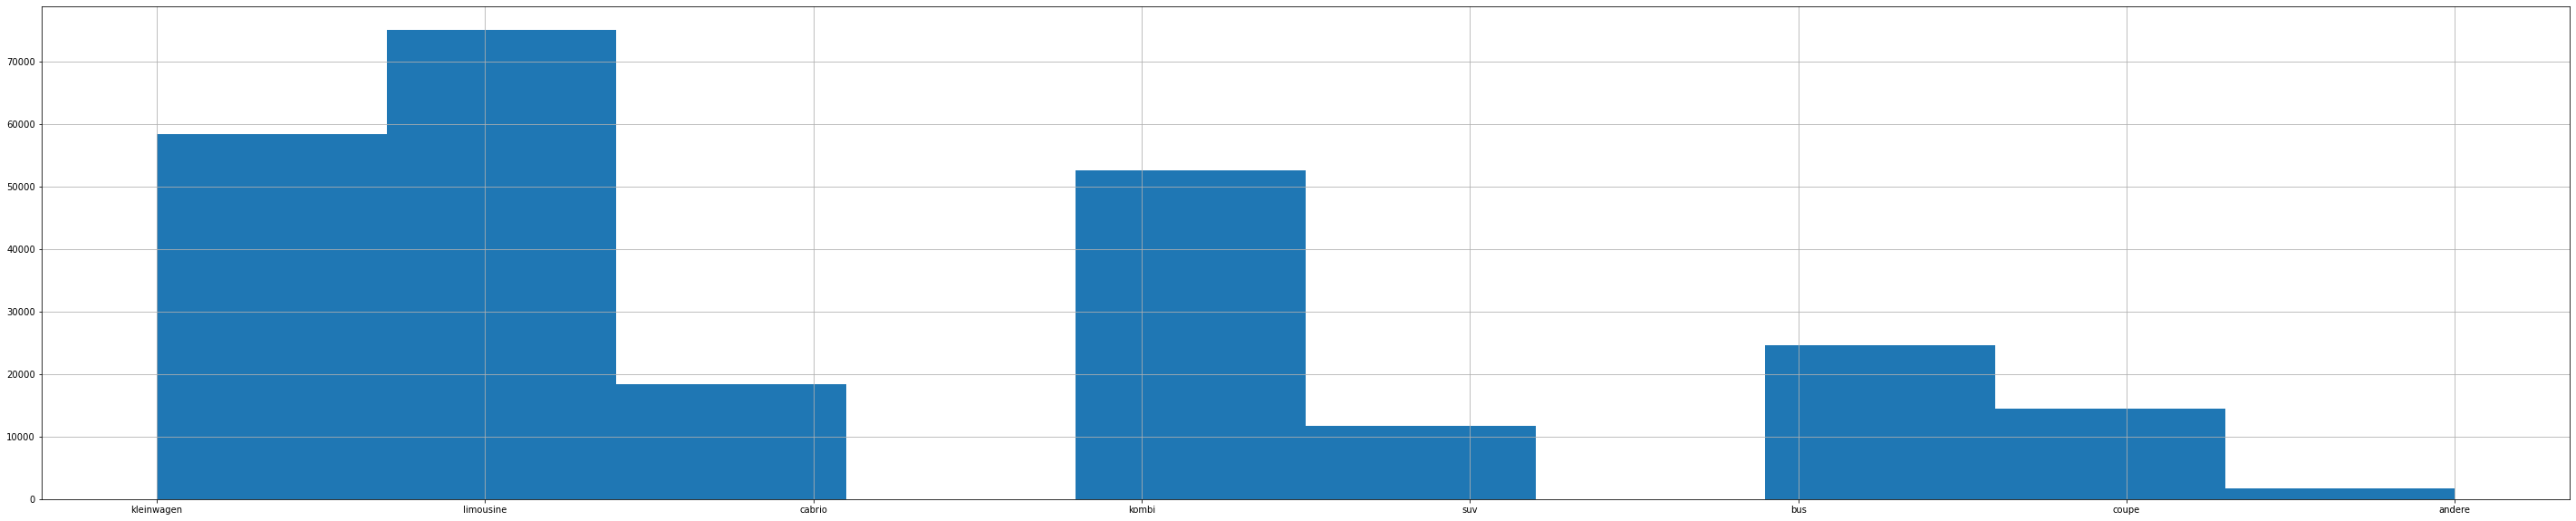

In [103]:
autos_fill['vehicleType'].hist()

### 6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [104]:
autos_fill['nameLen'] = [len(i) for i in autos_fill['name']]
autos_fill.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,nameLen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,...,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07,50
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,27
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,...,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58,28


### 7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,nameLen
price,1.000000,0.010373,0.008578,-0.013909,0.004761,NaN,0.001332,0.001981
yearOfRegistration,0.010373,1.000000,0.100702,-0.392250,0.032509,NaN,0.051012,0.067253
powerPS,0.008578,0.100702,1.000000,-0.015437,0.014217,NaN,0.028690,0.017312
kilometer,-0.013909,-0.392250,-0.015437,1.000000,-0.004110,NaN,-0.038026,-0.037763
monthOfRegistration,0.004761,0.032509,0.014217,-0.004110,1.000000,NaN,0.005233,0.006773
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,0.001332,0.051012,0.028690,-0.038026,0.005233,NaN,1.000000,-0.017983
nameLen,0.001981,0.067253,0.017312,-0.037763,0.006773,NaN,-0.017983,1.000000


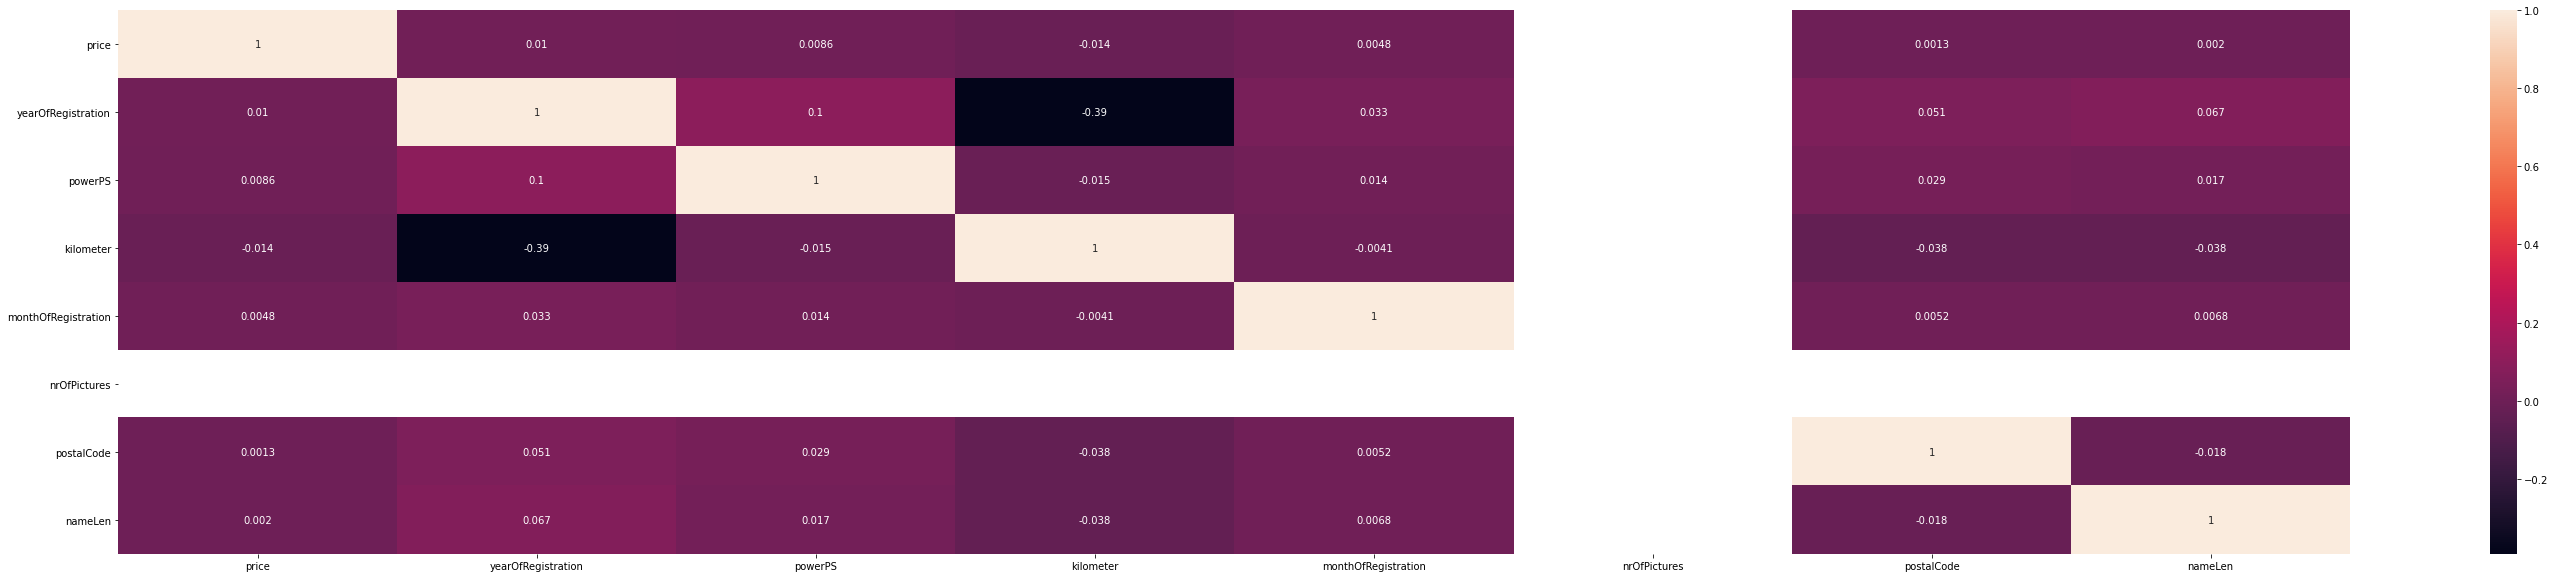

In [105]:
import seaborn as sns

sns.heatmap(autos_fill.corr(), annot=True)

autos_fill.corr()

### 8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.

In [106]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

In [107]:
vehicle_type = pd.Series(LabelEncoder().fit_transform(autos_fill.vehicleType))
pearsonK = pearsonr(autos_fill.price,vehicle_type)
spearmanK = spearmanr(autos_fill.price,vehicle_type)

Коэффициент корреляции Пирсона:  (-2.3030900976273326e-05, 0.9906863078750944)
Коэффициент корреляции Спримена:  SpearmanrResult(correlation=0.038207996340302565, pvalue=1.307975846291745e-83)
Приемлимое значение p-value!


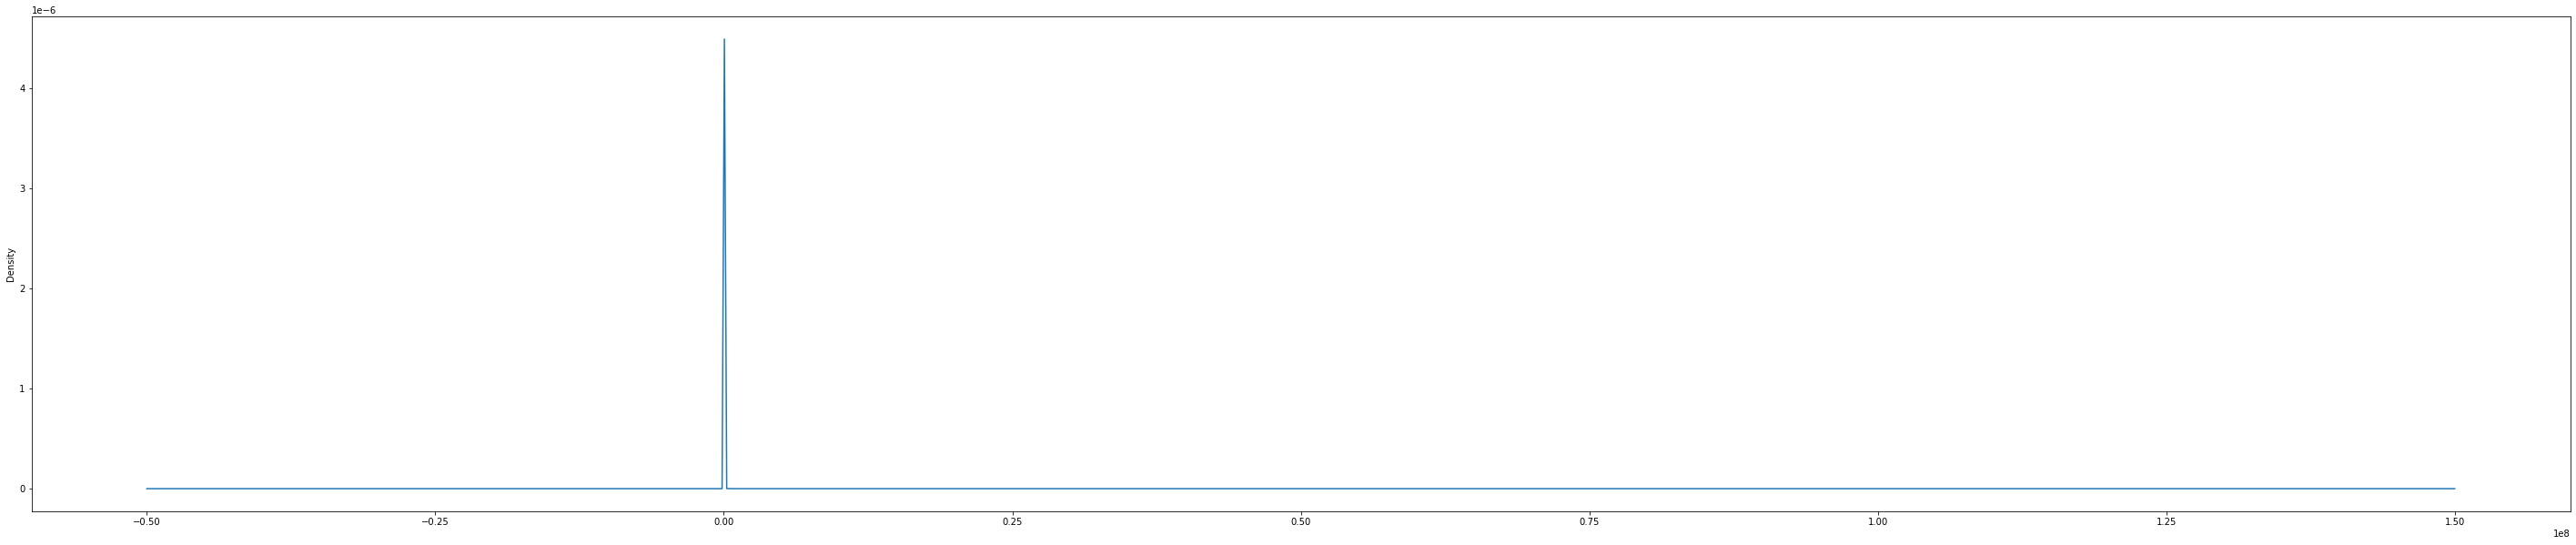

In [108]:
print('Коэффициент корреляции Пирсона: ', pearsonK)
print('Коэффициент корреляции Спримена: ', spearmanK)

print(('Приемлимое' if spearmanK[1] < 0.05 else 'Неприемлимое') + ' значение p-value!')

autos_fill.price.plot.kde()

### 9. Добавьте в набор данных признак, являющийся суммой двух других признаков

In [110]:
autos_fill['gearbox, fuel types '] = autos_fill['gearbox'] + ', ' + autos_fill['fuelType']
autos_fill.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,nameLen,"gearbox, fuel types"
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18,"manuell, benzin"
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30,"manuell, diesel"
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,...,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07,50,"manuell, benzin"
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,27,"manuell, benzin"
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,...,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58,28,"manuell, benzin"
